# **ChefSense**

In [1]:
import pandas as pd

In [3]:
# File path
file_path = '/content/Data Analyst Intern Assignment - Excel.xlsx'

# 1.Loading the dataset

In [4]:

user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

In [13]:
user_details.head()



,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [14]:
user_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes


In [8]:
cooking_sessions.head()


,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [15]:
cooking_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [9]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [16]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


# 2. Identifying and handling missing values

In [6]:
user_details.isnull().sum()

,0
User ID,0
User Name,0
Age,0
Location,0
Registration Date,0
Phone,0
Email,0
Favorite Meal,0
Total Orders,0


In [7]:
cooking_sessions.isnull().sum()

,0
Session ID,0
User ID,0
Dish Name,0
Meal Type,0
Session Start,0
Session End,0
Duration (mins),0
Session Rating,0


In [8]:
order_details.isnull().sum()

,0
Order ID,0
User ID,0
Order Date,0
Meal Type,0
Dish Name,0
Order Status,0
Amount (USD),0
Time of Day,0
Rating,2
Session ID,0


2.1. Handling the  missing numerical values by using the KNN Imputer

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=5)

In [11]:
order_details[['Rating', 'Amount (USD)']] = imputer.fit_transform(order_details[['Rating', 'Amount (USD)']])


In [12]:
order_details.isnull().sum()

,0
Order ID,0
User ID,0
Order Date,0
Meal Type,0
Dish Name,0
Order Status,0
Amount (USD),0
Time of Day,0
Rating,0
Session ID,0


# 3.Renaming the required columns.

In [13]:
order_details.rename(columns={'Amount (USD)': 'Amount'}, inplace=True)

# 4.Merging the Datasets

In [14]:
merged_data = pd.merge(cooking_sessions, user_details, on='User ID', how='inner')

In [15]:
merged_data = pd.merge(merged_data, order_details, on=['User ID', 'Session ID'], how='inner')

In [51]:
merged_data.head()

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Favorite Meal,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount,Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.6
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID            16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   User Name          16 non-null     object        
 9   Age                16 non-null     int64         
 10  Location           16 non-null     object        
 11  Registration Date  16 non-null     datetime64[ns]
 12  Phone              16 non-null     object        
 13  Email              16 non-null     object        
 14  Favorite Mea

#5. DATA ANALYSIS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

5.1. Demographic Insights

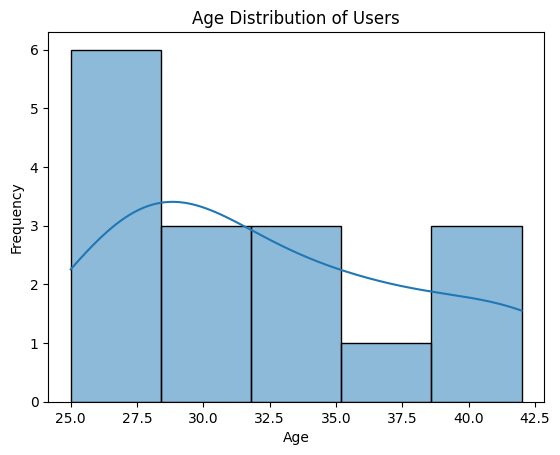

In [17]:
# Age Distribution
sns.histplot(merged_data['Age'], kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

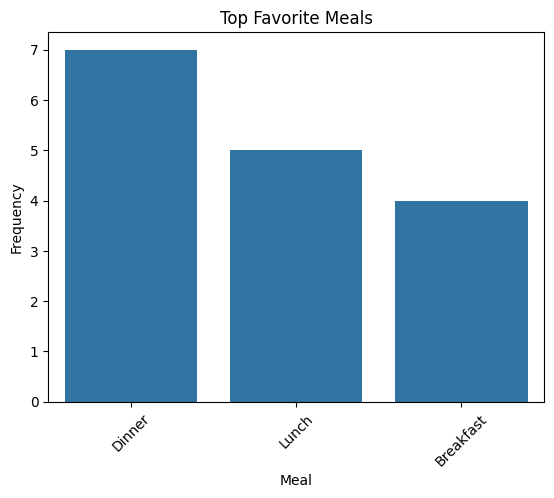

In [18]:
#Representing favorite meals
meal_counts = merged_data['Favorite Meal'].value_counts().head(10)
sns.barplot(x=meal_counts.index, y=meal_counts.values)
plt.title('Top Favorite Meals')
plt.xlabel('Meal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Segmenting users by age
age_groups = pd.cut(merged_data['Age'], bins=[18, 24, 30, 35, 40, 100], labels=['18-24', '25-30', '31-35', '36-40', '40+'])
print(age_groups.value_counts())
age_group_orders = merged_data.groupby(age_groups)['Total Orders'].sum()

Age
25-30    8
31-35    4
40+      3
36-40    1
18-24    0
Name: count, dtype: int64


<ipython-input-19-02927087efee>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_orders = merged_data.groupby(age_groups)['Total Orders'].sum()


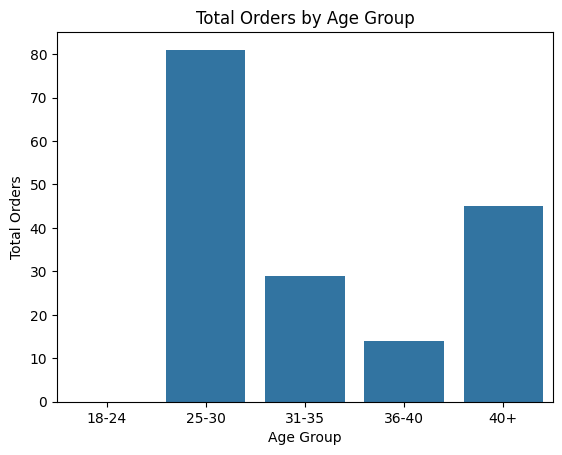

In [20]:
# Visualizing the order frequency by age group
sns.barplot(x=age_group_orders.index, y=age_group_orders.values)
plt.title('Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.show()

In [21]:
# Identifying the most active age group
most_active_age_group = age_group_orders.idxmax()
print(f"The most active age group is: {most_active_age_group}")

The most active age group is: 25-30


5.2 Cooking and Ordering Behavior

In [22]:
#Order Status indicates that the order was completed or canceled here (1 for completed, 0 for canceled)
merged_data['Order Completed'] = merged_data['Order Status'].apply(lambda x: 1 if x == 'Completed' else 0)


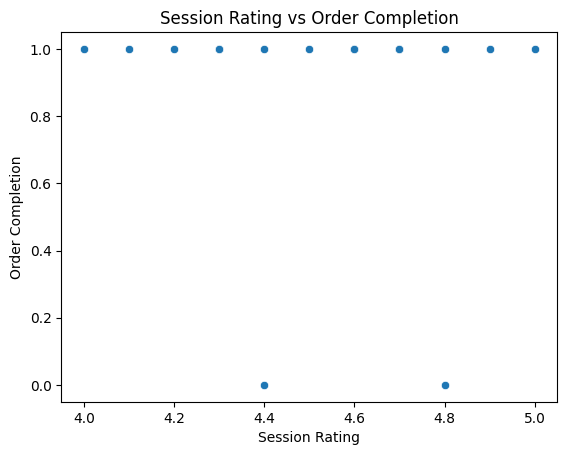

In [23]:
# Correlation between Session Rating and Order Completion
sns.scatterplot(data=merged_data, x='Session Rating', y='Order Completed')
plt.title('Session Rating vs Order Completion')
plt.xlabel('Session Rating')
plt.ylabel('Order Completion')
plt.show()

In [24]:
# Calculate correlation coefficient
correlation = merged_data['Session Rating'].corr(merged_data['Order Completed'])
print(f"Correlation coefficient is : {correlation}")

Correlation coefficient is : -0.10838980106369038


5.3.  Popular Dishes:


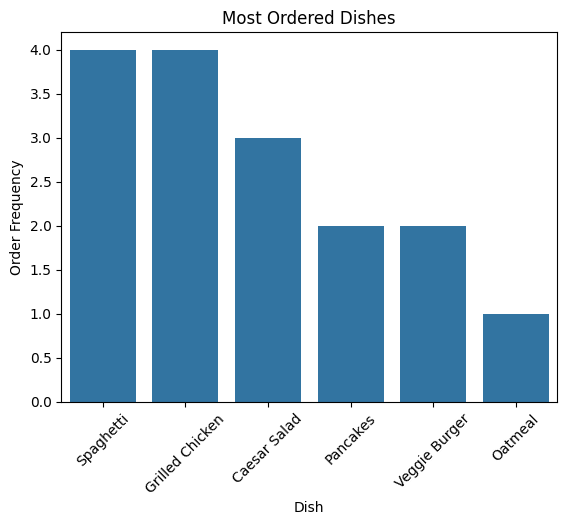

In [25]:
#Most Ordered Dishes
top_ordered_dishes = merged_data['Dish Name_y'].value_counts().head(10)
sns.barplot(x=top_ordered_dishes.index, y=top_ordered_dishes.values)
plt.title('Most Ordered Dishes')
plt.xlabel('Dish')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.show()

5.4. Time-Based Trends

5.4.1.Weekday vs. Weekend Order Patterns:

In [26]:
# Convert 'Order Date' to datetime
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

In [27]:
# Extracting the day of the week (0 = Monday, 6 = Sunday)
merged_data['Day of Week'] = merged_data['Order Date'].dt.dayofweek

In [28]:
# Weekday vs Weekend
merged_data['Weekday/Weekend'] = merged_data['Day of Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')


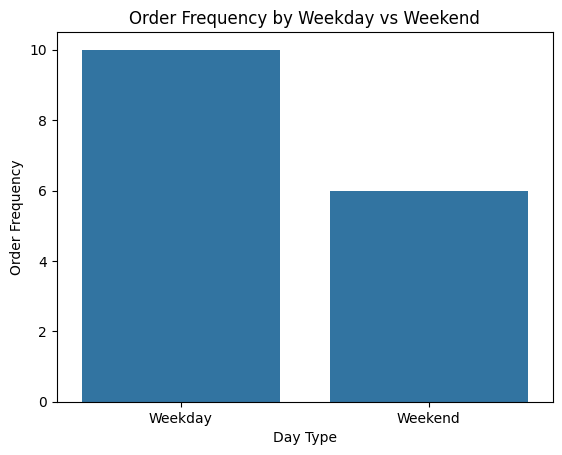

In [29]:
# Count orders for Weekday/Weekend
weekday_orders = merged_data['Weekday/Weekend'].value_counts()
sns.barplot(x=weekday_orders.index, y=weekday_orders.values)
plt.title('Order Frequency by Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Order Frequency')
plt.show()

5.5. Seasonal Variations in Dish Popularity:

In [30]:
# Extract month from 'Order Date'
merged_data['Month'] = merged_data['Order Date'].dt.month

In [31]:
# Popular dishes by month
month_dish_orders = merged_data.groupby('Month')['Dish Name_y'].value_counts().unstack().fillna(0)


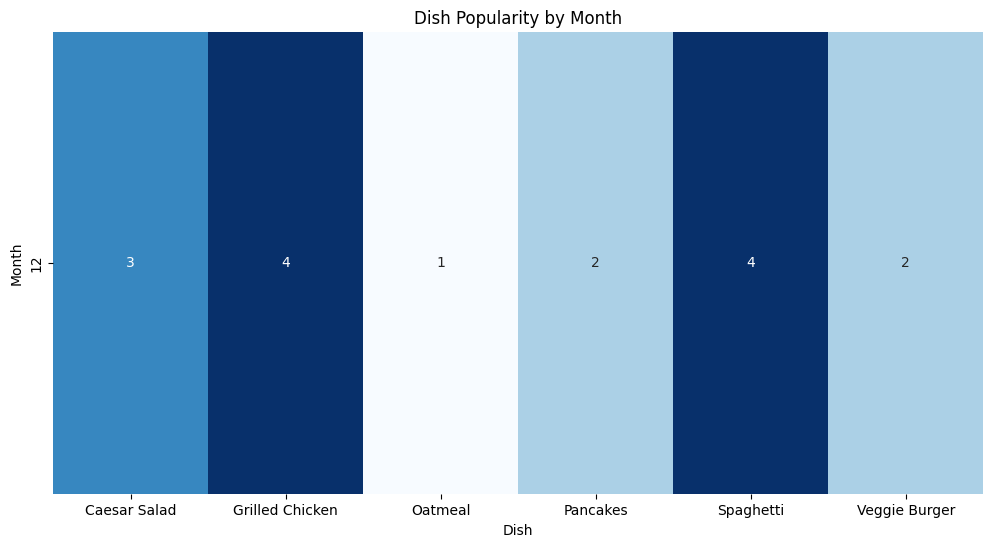

In [32]:
# Plot to show popularity of dishes across different months
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(month_dish_orders, cmap='Blues', annot=True, fmt='g', cbar=False)
plt.title('Dish Popularity by Month')
plt.xlabel('Dish')
plt.ylabel('Month')
plt.show()

5.6. Order Cancellations

In [33]:
# Calculate cancellation rate
cancellation_rate = merged_data['Order Completed'].mean()
print(f"Cancellation Rate: {cancellation_rate * 100:.2f}%")

Cancellation Rate: 87.50%


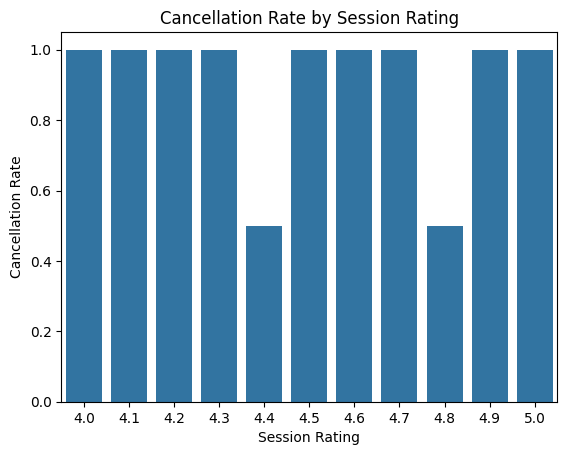

In [34]:
# Cancellation rate by session rating
cancellation_by_session_rating = merged_data.groupby('Session Rating')['Order Completed'].mean()
sns.barplot(x=cancellation_by_session_rating.index, y=cancellation_by_session_rating.values)
plt.title('Cancellation Rate by Session Rating')
plt.xlabel('Session Rating')
plt.ylabel('Cancellation Rate')
plt.show()

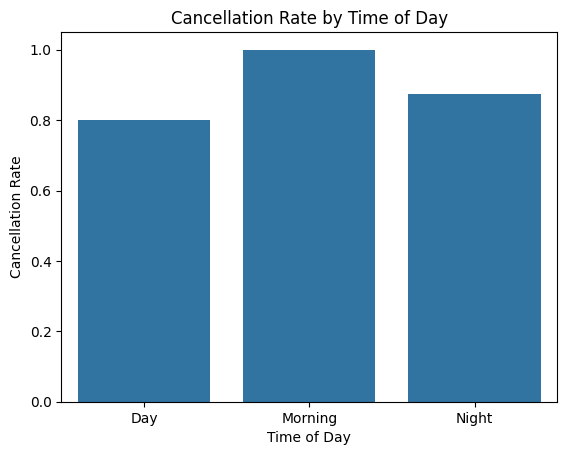

In [35]:
# Cancellation rate by time of day
cancellation_by_time_of_day = merged_data.groupby('Time of Day')['Order Completed'].mean()
sns.barplot(x=cancellation_by_time_of_day.index, y=cancellation_by_time_of_day.values)
plt.title('Cancellation Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Cancellation Rate')
plt.show()

#6. Some more Visualisations

6.1. Heatmap to show the Correlation Between Session and Order Ratings

In [38]:
# Calculate correlation between Session Rating and Order Rating
correlation_data = merged_data[['Session Rating', 'Rating']].corr()


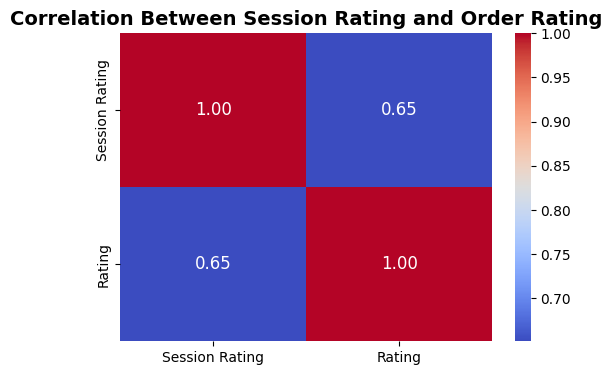

In [39]:

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 12})
plt.title('Correlation Between Session Rating and Order Rating', fontsize=14, fontweight='bold')
plt.show()

6.2.  Scatter Plots to show the  Relationship Between Session Duration and Order Amount

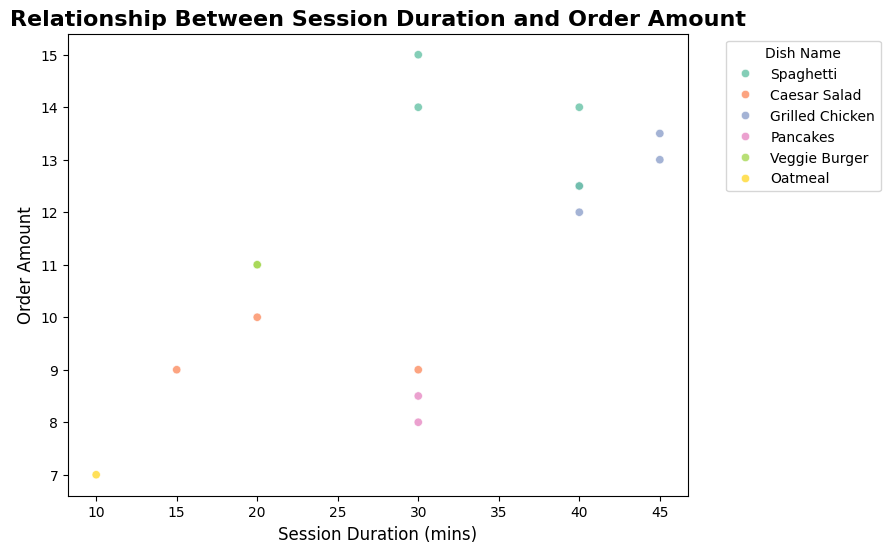

In [40]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Duration (mins)', y='Amount', hue='Dish Name_y', palette='Set2', alpha=0.8)
plt.title('Relationship Between Session Duration and Order Amount', fontsize=16, fontweight='bold')
plt.xlabel('Session Duration (mins)', fontsize=12)
plt.ylabel('Order Amount', fontsize=12)
plt.legend(title='Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)  # Adjust legend outside the plot
plt.show()

6.3. Demographic Trends and Dish Analysis

In [45]:
import plotly.express as px

In [41]:
# Create age group distribution
age_groups = pd.cut(merged_data['Age'], bins=[18, 24, 30, 35, 40, 100], labels=['18-24', '25-30', '31-35', '36-40', '40+'])
age_group_counts = age_groups.value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

In [43]:

fig = px.bar(age_group_counts, x='Age Group', y='Count', title='User Distribution by Age Group',
             labels={'Age Group': 'Age Group', 'Count': 'Number of Users'}, color='Age Group', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Number of Users', title_font=dict(size=18, family='Verdana'))
fig.show()

6.4.  Boxplot to show the Distribution of Order Amounts by Dish Type

<ipython-input-46-caf40a5fb002>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




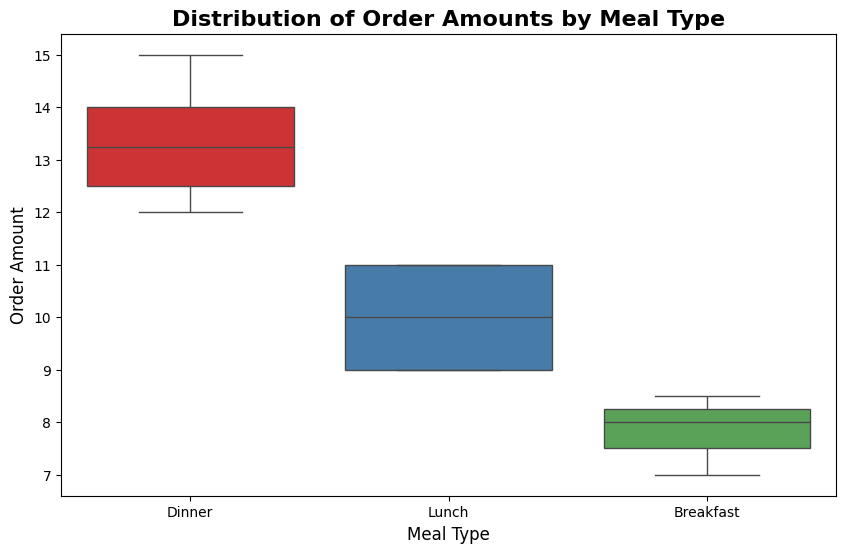

In [46]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Meal Type_y', y='Amount', palette='Set1')
plt.title('Distribution of Order Amounts by Meal Type', fontsize=16, fontweight='bold')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Order Amount', fontsize=12)
plt.show()

6.5. Violin Plot to show the  User Rating Distribution by Dish Type

<ipython-input-48-701c73621692>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




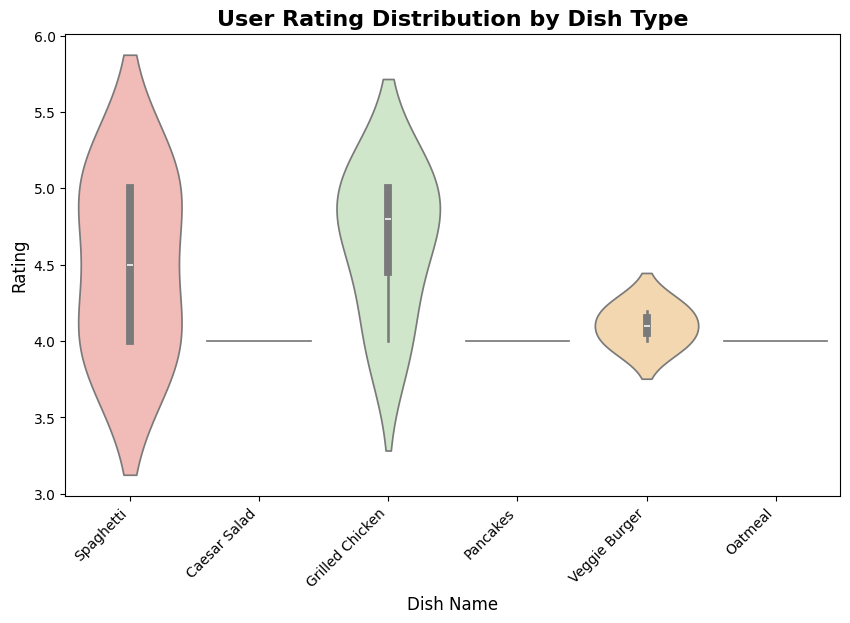

In [48]:

plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='Dish Name_y', y='Rating', palette='Pastel1')
plt.title('User Rating Distribution by Dish Type', fontsize=16, fontweight='bold')
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

6.6. Pie Chart to show the Order Status Breakdown

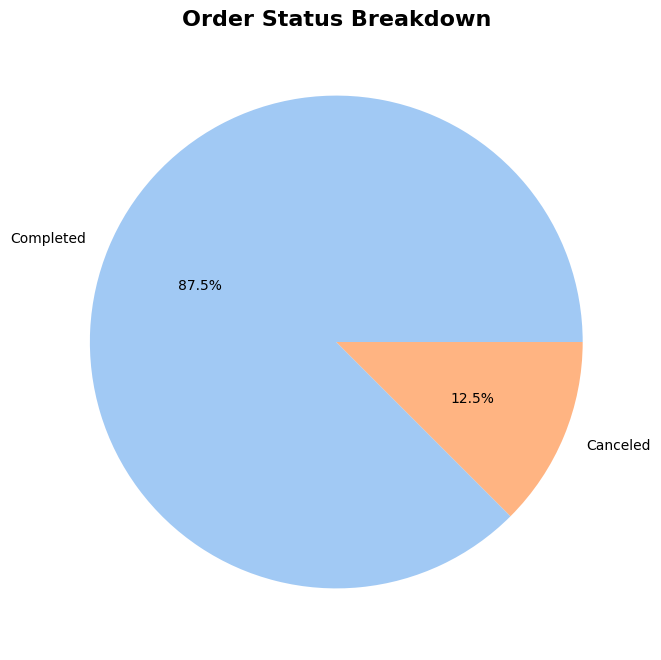

In [49]:

order_status_counts = merged_data['Order Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=len(order_status_counts)))
plt.title('Order Status Breakdown', fontsize=16, fontweight='bold')
plt.show()

 6.7. Heatmap to show the  User Activity by Time of Day and Day of the Week

In [50]:
# Create a new column for the day of the week
merged_data['Day of Week'] = merged_data['Order Date'].dt.day_name()

In [51]:
# Create a pivot table of the number of orders by day and time of day
activity_heatmap = pd.crosstab(merged_data['Day of Week'], merged_data['Time of Day'])


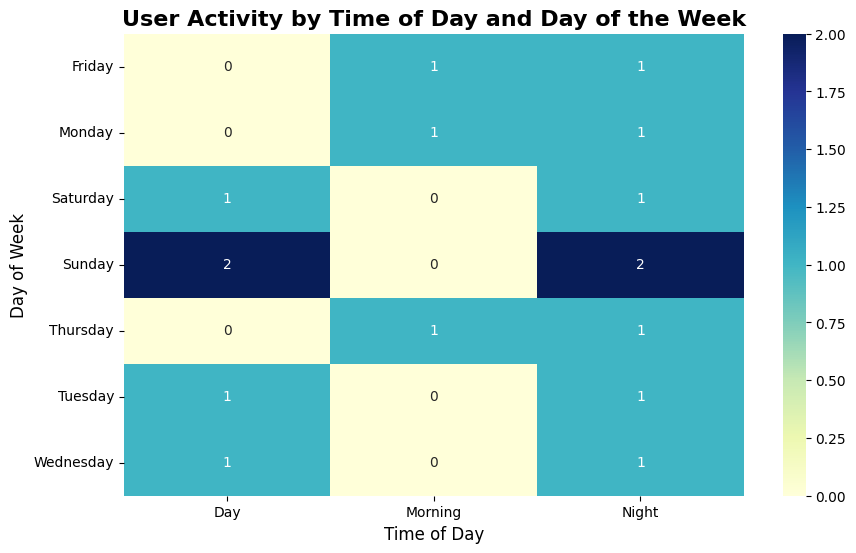

In [52]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(activity_heatmap, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('User Activity by Time of Day and Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

6.8.Stacked Bar Chart to show the  Meal Types and Dish Popularity

In [53]:
# Create a pivot table for meal type and dish popularity
meal_dish_pivot = pd.crosstab(merged_data['Meal Type_y'], merged_data['Dish Name_y'])


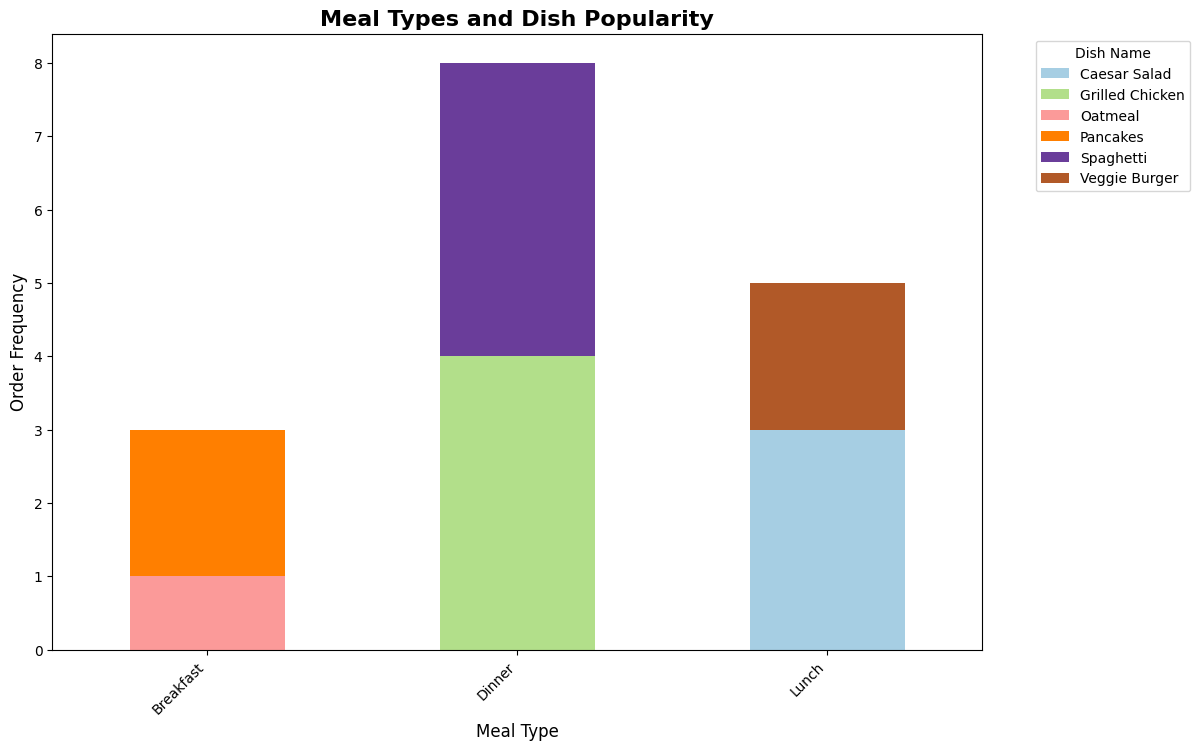

In [54]:

meal_dish_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Meal Types and Dish Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Order Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

6.9. Bubble Chart to show the  Correlation Between Session Duration, Order Amount, and Ratings


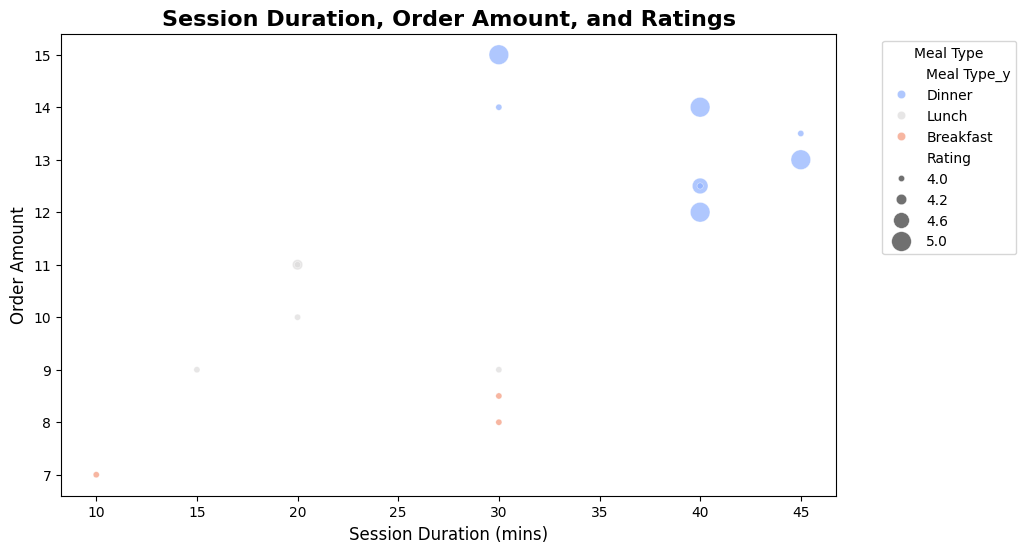

In [55]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Duration (mins)', y='Amount', size='Rating', hue='Meal Type_y', palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.title('Session Duration, Order Amount, and Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Session Duration (mins)', fontsize=12)
plt.ylabel('Order Amount', fontsize=12)
plt.legend(title='Meal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7. ADVANCED ANALYSIS

7.1. Predictive Analysis for User Engagement and Order Conversion

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [57]:
# Feature engineering (using session data to predict order placement)
merged_data['Order_Completed'] = (merged_data['Order Status'] == 'Completed').astype(int) # Replace df with merged_data

In [58]:
# Splitting the data
X = merged_data[['Age', 'Session Rating', 'Duration (mins)', 'Total Orders']]  # Features
y = merged_data['Order_Completed']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
# Model: Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# 8. RECOMMENDATIONS

8.1. Real-Time Dish Personalization

Approach:


1.Track a user’s previous orders and cooking sessions.

2.Based on their order history, provide dish recommendations.

3.Simulate weather and offer dishes accordingly (e.g., warm food in winter, cold food in summer).

In [61]:
# Simulating user data
user_data = {
    'User_ID': ['U001', 'U002', 'U003', 'U004'],
    'Favorite_Dish': ['Spaghetti', 'Caesar Salad', 'Chicken Soup', 'Pizza'],
    'Order_History': [['Spaghetti', 'Pizza'], ['Caesar Salad', 'Pasta'], ['Chicken Soup'], ['Pizza', 'Burger']],
}

In [62]:
# Simulate weather based on month (1: cold, 2: warm)
current_month = 12  # December (Cold)
weather = 'Cold' if current_month in [1, 2, 12] else 'Warm'


In [63]:
# Dish recommendations based on weather
def recommend_dishes(weather, user_favorites):
    if weather == 'Cold':
        recommendations = ['Soup', 'Stew', 'Pasta', 'Hot Chocolate']
    else:
        recommendations = ['Salad', 'Cold Sandwich', 'Fruit Bowl', 'Iced Coffee']

    # Suggest dishes based on favorite meals
    if weather == 'Cold' and 'Soup' not in user_favorites:
        recommendations.append('Chicken Soup')
    elif weather == 'Warm' and 'Salad' not in user_favorites:
        recommendations.append('Caesar Salad')

    return recommendations


In [65]:
# Convert user_data to DataFrame
users = pd.DataFrame(user_data)

In [66]:
# Adding recommendations based on user preferences and weather
users['Recommended_Dishes'] = users['Favorite_Dish'].apply(lambda x: recommend_dishes(weather, x))
print(users[['User_ID', 'Recommended_Dishes']])

  User_ID                                Recommended_Dishes
0    U001  [Soup, Stew, Pasta, Hot Chocolate, Chicken Soup]
1    U002  [Soup, Stew, Pasta, Hot Chocolate, Chicken Soup]
2    U003                [Soup, Stew, Pasta, Hot Chocolate]
3    U004  [Soup, Stew, Pasta, Hot Chocolate, Chicken Soup]


8.2. AI-Driven Dish Rotation System Based on User Interaction

Approach:

1.Track user preferences over time.

2.Identify which dishes are most frequently ordered and which are not.

3.Automatically suggest new dishes that have not been seen or ordered recently.

In [67]:
# Simulating a dataset of user orders
order_data = {
    'User_ID': ['U001', 'U002', 'U003', 'U004', 'U001', 'U003', 'U002', 'U004'],
    'Dish_Ordered': ['Spaghetti', 'Caesar Salad', 'Pizza', 'Burger', 'Pizza', 'Pasta', 'Caesar Salad', 'Pizza'],
}


In [68]:
orders = pd.DataFrame(order_data)

In [69]:
# Track the frequency of dishes ordered
dish_frequency = orders['Dish_Ordered'].value_counts()

In [70]:
# Recommend dishes based on order frequency and rotation
def rotate_menu(dish_frequency):

    least_ordered = dish_frequency.tail(2).index.tolist()
    new_menu = list(dish_frequency.index) + least_ordered
    return new_menu


In [71]:
# Get the rotated menu
rotated_menu = rotate_menu(dish_frequency)
print("Rotated Menu: ", rotated_menu)

Rotated Menu:  ['Pizza', 'Caesar Salad', 'Spaghetti', 'Burger', 'Pasta', 'Burger', 'Pasta']
